In [82]:
#import shutil
#shutil.rmtree ('/content/cell-images/cell_images/cell_images/Uninfected/')
# or can use 
!rm -rf "/content/cell_images/cell_images"

In [1]:
!pip install kaggle

In [2]:
!mkdir .kaggle

In [5]:

import json
#for key go to kaggle - 'My profile' --> 'Edit profile' --> 'API' --> 'Create new API Token' 
# --> Use that as key
token = {"username":"your username","key":"your key"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [6]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
#Configure the file
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [7]:
!chmod 600 /root/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria -p /content

 97% 657M/675M [00:04<00:00, 171MB/s]
100% 675M/675M [00:04<00:00, 154MB/s]


In [86]:
#imports
import cv2
import os
import os
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization, Flatten



In [10]:
root_path = '/content/cell-images.zip'
zip_ref = zipfile.ZipFile(root_path,'r')
zip_ref.extractall('/content/')


In [22]:
file_path='/content/cell_images'
path_to_p = "/content/cell_images/Parasitized"
path_to_u = "/content/cell_images/Uninfected"


In [58]:
paths=[path_to_p,path_to_u]
paths_list=["/content/cell_images/Parasitized","/content/cell_images/Uninfected"]

['/content/cell_images/Parasitized', '/content/cell_images/Uninfected']

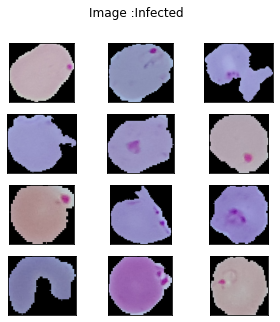

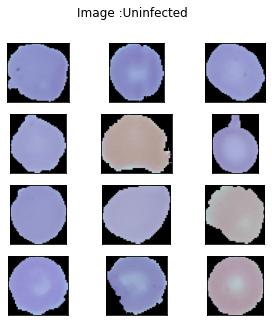

In [78]:
for images in paths:
  plt.figure(figsize=(5, 5))
  n=1

  for iim in os.listdir(images)[:12]:
    image = cv2.imread(images+'/'+iim)
    col=3
    row=4
    plt.subplot(row,col,n)
    plt.imshow(image)
    plt.tick_params(axis='both', which='both', 
                      top=False, bottom=False, left=False, right=False,
                      labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    n +=1
  label=images[21:]
  tag= lambda label: 'Infected' if label=='Parasitized' else "Uninfected"
  plt.suptitle(f"Image :{tag(label)}")
  plt.show()


In [92]:
width = 56
height = 56

In [80]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [93]:
train_data_generator = datagen.flow_from_directory('/content/cell_images', target_size= (width,height),
                                                   class_mode='binary',
                                                   batch_size=16,
                                                   subset='training')
validation_data_generator= datagen.flow_from_directory('/content/cell_images',target_size=(width,height),
                                                       class_mode='binary',
                                                       batch_size=16,
                                                       subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [94]:
train_data_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [112]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(width,height,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [113]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 54, 54, 16)        448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 27, 27, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)             

In [114]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [115]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch=len(train_data_generator),
                              epochs=9,
                              validation_data=validation_data_generator,
                              validation_steps=len(validation_data_generator),
                              )

Epoch 1/9
1378/1378 [==============================] - 86s 62ms/step - loss: 0.5540 - accuracy: 0.7214 - val_loss: 0.3123 - val_accuracy: 0.9049
Epoch 2/9
1378/1378 [==============================] - 84s 61ms/step - loss: 0.2754 - accuracy: 0.9084 - val_loss: 0.2031 - val_accuracy: 0.9301
Epoch 3/9
1378/1378 [==============================] - 83s 60ms/step - loss: 0.2166 - accuracy: 0.9251 - val_loss: 0.1866 - val_accuracy: 0.9191
Epoch 4/9
1378/1378 [==============================] - 84s 61ms/step - loss: 0.2003 - accuracy: 0.9303 - val_loss: 0.1821 - val_accuracy: 0.9416
Epoch 5/9
1378/1378 [==============================] - 88s 64ms/step - loss: 0.1884 - accuracy: 0.9414 - val_loss: 0.1694 - val_accuracy: 0.9416
Epoch 6/9
1378/1378 [==============================] - 83s 60ms/step - loss: 0.1787 - accuracy: 0.9448 - val_loss: 0.1711 - val_accuracy: 0.9396
Epoch 7/9
1378/1378 [==============================] - 85s 62ms/step - loss: 0.1759 - accuracy: 0.9453 - val_loss: 0.1724 - val_ac

In [117]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


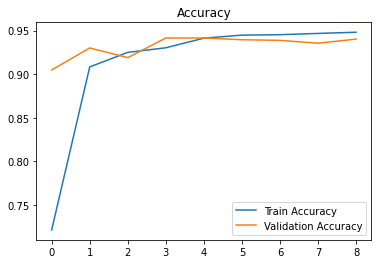

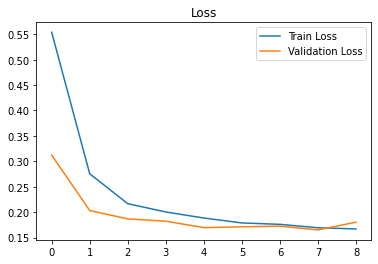

In [118]:
# Accuracy 
plt.figure()
plt.plot(train_acc,label='Train Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

#Loss
plt.figure()
plt.plot(train_loss,label='Train Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()
